# Prediction of car price using Linear Regression in Python
# Author: Adrian Żelazek

## Table of contents

Introduction<br>
1. Libraries
2. Dataset
3. Formatting of dataset
4. Visualization and grouping of data<br>
> 4.1 analysis of target variable (price)<br>
> 4.2 visualization of categorical data<br>
> 4.3 visualization of numerical data
5. Linear Regression models<br>
> 5.1 Dummy variables and binary coding<br>
>> 5.2 **MODEL 1 with data selection using Pearson correlation + model evaluation**<br>
>>> 5.2.1 Data selection<br>
>>> 5.2.2 Model building <br>
>>> 5.2.3 Model interpretation <br>
>>> 5.2.4 Export of model prediction to excel<br> 
>>> 5.2.5 Model evaluation + comparison of training and test dataset results<br>
>>>> 5.3 **MODEL 2 with data selection using RFE (Recursive Feature Elimination) + model evaluation**<br>
>>>>> 5.3.1 Data selection <br>
>>>>> 5.3.2 Model building <br>
>>>>> 5.3.3 Model interpretation <br>
>>>>> 5.3.4 Export of model prediction to excel<br>
>>>>> 5.3.5 Model evaluation + comparison of training and test dataset results <br>
>>>>>> 5.4 **MODEL 3 with data selection using embedded method (LASSO regularization) + model evaluation**<br>
>>>>>>> 5.4.1 Data selection <br>
>>>>>>> 5.4.2 Model building <br>
>>>>>>> 5.4.3 Model interpretation <br>
>>>>>>> 5.4.4 Export of model prediction to excel<br>
>>>>>>> 5.4.5 Model evaluation + comparison of training and test dataset results <br>
6. Models comparision
7. Conclusion

## Introduction

<font size="4">

<b>Dataset description:</b><br>
Dataset contains features of cars. This dataset contains 205 observations as well as 26 variables.<br>

<b>Target variable:</b><br>
Car price<br>

<b>Problem description:</b><br>
Predicting car price based on its features.<br>

<b>Programming language:</b><br>
Python<br>

<b>Libraries:</b><br>
Scikit-learn, Pandas, NumPy, Matplotlib, Seaborn<br>

<b>Algorithms:</b><br>
Linear Regression, Pearson correlation, RFE (Recursive Feature Elimination), Lasso regularizaTion<br>

<b>Methods of model evaluation</b><br>
MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error), R-squared (R2).

## 1. Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score 

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Version of Python and libraries used 
from platform import python_version
import sklearn
import matplotlib
print("Python version is {}".format(python_version()))
print("Scikit-learn version is {}".format(sklearn.__version__))
print("Pandas version is {}".format(pd.__version__))
print("Numpy version is {}".format(np.__version__))
print("Matplotlib version is {}".format(matplotlib.__version__))
print("Seaborn version is {}".format(sns.__version__))

Python version is 3.7.4
Scikit-learn version is 0.23.2
Pandas version is 0.25.1
Numpy version is 1.16.5
Matplotlib version is 3.1.2
Seaborn version is 0.9.0


## 2. Dataset

In [3]:
#Read data 
data = pd.read_csv("car_price.csv")

In [4]:
#Start of dataset 
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#End of dataset 
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
#Dataset description 
print("Dataset contains {} observations as well as {} variables.".format(data.shape[0], data.shape[1]))

Dataset contains 205 observations as well as 26 variables.


In [7]:
#list of variables in the dataset 
print("List of variables in dataset: {}".format(list(data.columns)))

List of variables in dataset: ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [8]:
#Basic information about dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

<font size="4">There are 16 numeric variables and 10 categorical variables in the dataset. Size of 41.8+ KB and all variables are not null.

In [9]:
#Data types in the dataset 
print("Columns in dataset: ","\n", list(data.columns),"\n")
print("Categorical Columns in dataset: ","\n",list(data.select_dtypes(include="object")),"\n")
print("Numerical Columns in dataset: ","\n",list(data.select_dtypes(include=["int64", "float64"])), "\n")
print("Datetime Columns in dataset: ","\n",list(data.select_dtypes(include="datetime64")))

Columns in dataset:  
 ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] 

Categorical Columns in dataset:  
 ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] 

Numerical Columns in dataset:  
 ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] 

Datetime Columns in dataset:  
 []


In [10]:
#Missing values analysis 
#Sum of missing values in each column of the dataset, descending sorting
totalSumNull = data.isnull().sum().sort_values(ascending=False)

#Sum of missing values in each column of the dataset expressed as a percentage
percentSumNull = data.isnull().sum()/data.isnull().count()*100

#Rounding off the percentages to one decimal place, degressive sorting
percentSumNullRounded = (round(percentSumNull, 1)).sort_values(ascending=False)

#Combining "totalNull" and "percentRounded" in DataFrame
missingData = pd.concat([totalSumNull, percentSumNullRounded], axis=1, keys=["Total", "%"])
missingData

,Total,%
price,0,0.0
highwaympg,0,0.0
symboling,0,0.0
CarName,0,0.0
fueltype,0,0.0
aspiration,0,0.0
doornumber,0,0.0
carbody,0,0.0
drivewheel,0,0.0
enginelocation,0,0.0


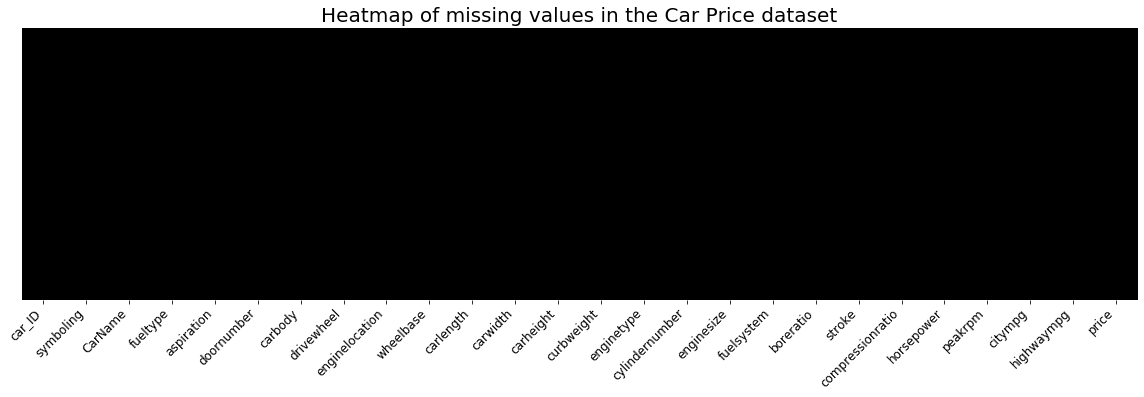

In [11]:
#Heatmap of missing values 
#Size of the plot 
plt.figure(figsize=(20,5))

#Creation of the heatmap 
sns.heatmap(data.isnull(),
            yticklabels=False,
            cbar=False, 
            cmap="bone").set_title("Heatmap of missing values in the Car Price dataset", 
                                   fontsize = 20)

#X-axis descriptions in terms of rotation and size of caption 
plt.xticks(rotation=45, fontsize=12, horizontalalignment="right")
plt.show()

## 3. Formatting of dataset

In [12]:
#Separating the company name from the car model 
CompanyName = data["CarName"].apply(lambda x : x.split(' ')[0])

#Addition of a new column 
data.insert(3,"CompanyName",CompanyName)

#Removal of the CarName column
data.drop(["CarName"],axis=1,inplace=True)
data.sample()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
35,36,0,honda,gas,std,four,sedan,fwd,front,96.5,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7295.0


In [13]:
#Formatting the car brand name to start with a capital letter 
data["CompanyName"] = data["CompanyName"].str.capitalize()

In [14]:
#Names of all car brands in the dataset 
data.CompanyName.unique()

array(['Alfa-romero', 'Audi', 'Bmw', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Maxda', 'Mazda', 'Buick', 'Mercury',
       'Mitsubishi', 'Nissan', 'Peugeot', 'Plymouth', 'Porsche',
       'Porcshce', 'Renault', 'Saab', 'Subaru', 'Toyota', 'Toyouta',
       'Vokswagen', 'Volkswagen', 'Vw', 'Volvo'], dtype=object)

In [15]:
#Formatting of wrong car brand names 
def replaceCompanyName(x,y):
    data["CompanyName"].replace(x,y,inplace=True)

replaceCompanyName("Maxda","Mazda")
replaceCompanyName("Porcshce","Porsche")
replaceCompanyName("Toyouta","Toyota")
replaceCompanyName("Vokswagen","Volkswagen")
replaceCompanyName("Vw","Volkswagen")

In [16]:
#Formatted car brand names 
data.CompanyName.unique()

array(['Alfa-romero', 'Audi', 'Bmw', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Mazda', 'Buick', 'Mercury', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab',
       'Subaru', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [17]:
#Checking the existence of duplicate cars in the dataset 
sum(data.duplicated(subset = "car_ID")) == 0

True

In [18]:
#Checking the existence of duplicates in the entire dataset 
data.loc[data.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


## 4. Visualisation and grouping of data

### 4.1 Analysis of target variable (price)

In [19]:
#Percentiles in the price of cars 
data.price.describe(percentiles = [0.10,0.25,0.50,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
10%       6657.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

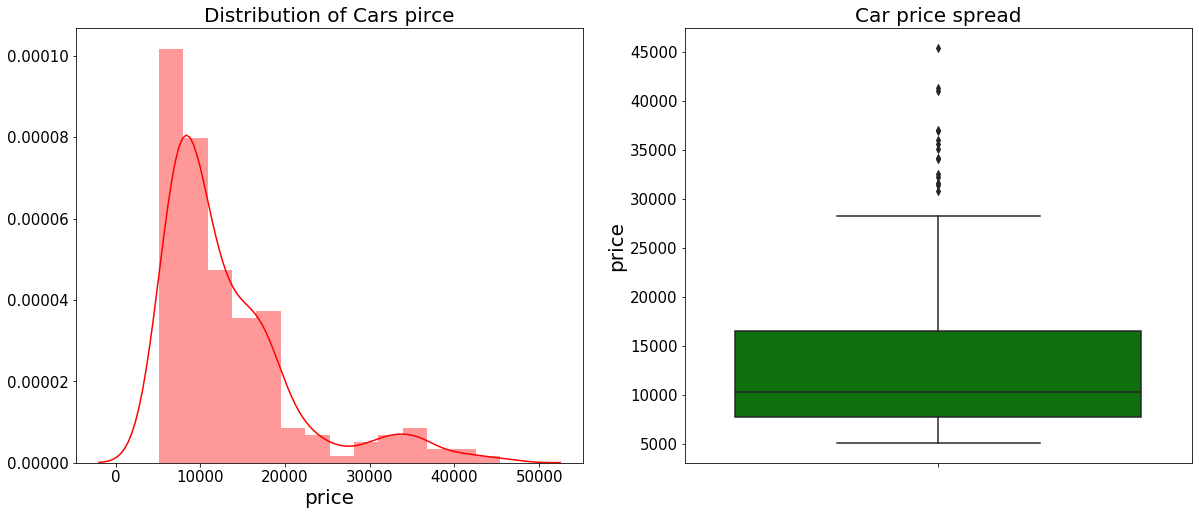

In [20]:
#Plots of distribution of cars price and car price spread
#Size of plots
plt.figure(figsize=(20,8))

#Configuration of Distribution of Cars pirce plot 
plt.subplot(1,2,1)
sns.distplot(data.price, color="Red").set_title("Distribution of Cars pirce", fontsize=20)
plt.xlabel("price",fontsize=20)
plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#Configuration of Car price spread plot
plt.subplot(1,2,2)
sns.boxplot(y=data.price, color="green").set_title("Car price spread", fontsize=20)
plt.xlabel("")
plt.ylabel("price", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [21]:
#Grouping of cars by brands and calculation of average price based on features
meanPriceBasedCategory = pd.DataFrame(data.groupby(["CompanyName",
                                                    "fueltype",
                                                    "doornumber",
                                                    "carbody",
                                                    "horsepower"])["price"].mean().sort_values(ascending = False))
meanPriceBasedCategory

,,,,,price
CompanyName,fueltype,doornumber,carbody,horsepower,
Buick,gas,two,hardtop,184,45400.0
Bmw,gas,two,sedan,182,41315.0
Buick,gas,four,sedan,184,40960.0
Porsche,gas,two,convertible,207,37028.0
Jaguar,gas,two,sedan,262,36000.0
...,...,...,...,...,...
Toyota,gas,two,hatchback,62,5843.0
Plymouth,gas,two,hatchback,68,5572.0
Honda,gas,two,hatchback,60,5399.0


In [22]:
#Grouping of cars by brands and calculation of basic parameters 
priceStatistics = data.groupby("CompanyName")["price"].agg(['min', 'max', "mean"])
priceStatistics["rank"] = priceStatistics["mean"].rank(ascending=False).astype(int)
priceStatistics = priceStatistics.sort_values("mean", ascending=False)
priceStatistics

,min,max,mean,rank
CompanyName,,,,
Jaguar,32250.0,36000.0,34600.000000,1
Buick,25552.0,45400.0,33647.000000,2
Porsche,22018.0,37028.0,31400.500000,3
Bmw,16430.0,41315.0,26118.750000,4
Volvo,12940.0,22625.0,18063.181818,5
Audi,13950.0,23875.0,17859.166714,6
Mercury,16503.0,16503.0,16503.000000,7
Alfa-romero,13495.0,16500.0,15498.333333,8
Peugeot,11900.0,18150.0,15489.090909,9


### Observations:

<font size="4"> 
* The average price of a car in the data set is 13 276.71.
* The media is 10 295 and there is a notable difference between average car price and median. 
* 85% of the prices of cars are below 18 500, whereas the rest 15% are between 18 500 and 45 400.
* Taking into account the average price, the most expensive car in the database is a Buick, gas-powered with two doors, "hardtop" type of car body with 184 horsepower. The average price of such a car is 45 400.
* Taking into account the average price, the cheapest car in the dataset is a Subaru, gas-powered with two-doors, "hetchback" type of car body with 69 horsepower. The average price of such a car is 5 118.
* Jaguar cars have the highest average price in the dataset. Then there are Buick and Porsche cars. 
* The lowest average price in the dataset is for Chevrolet cars.

### 4.2 Visualization of categorical data

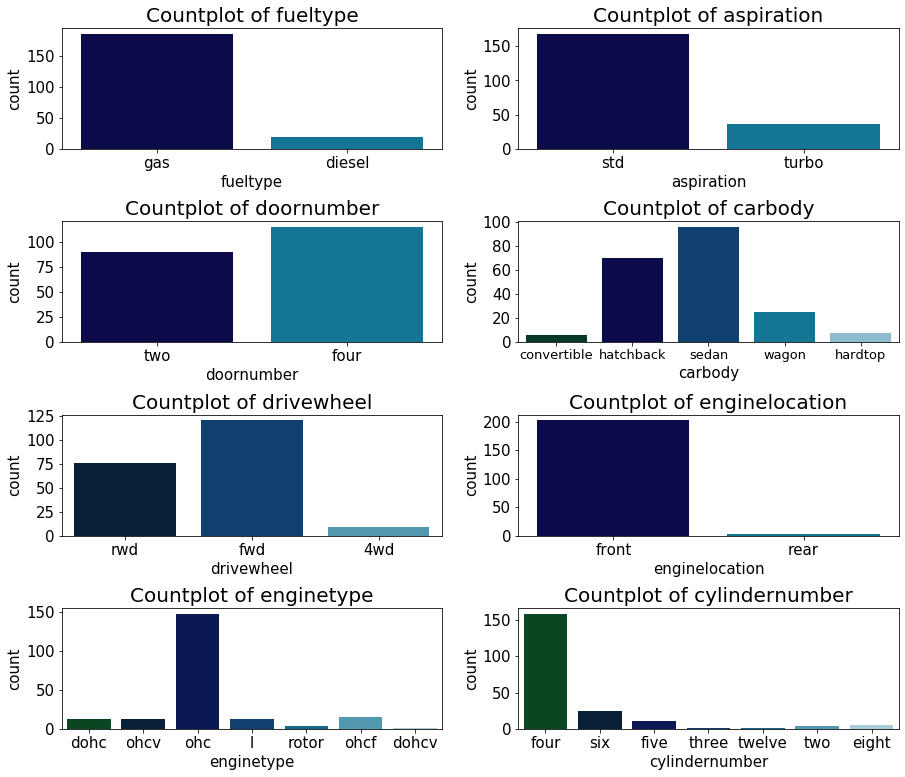

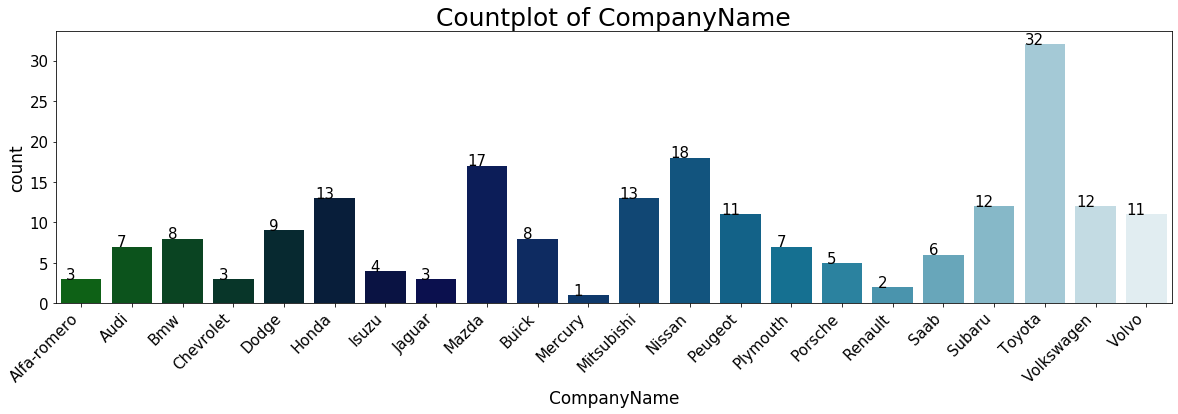

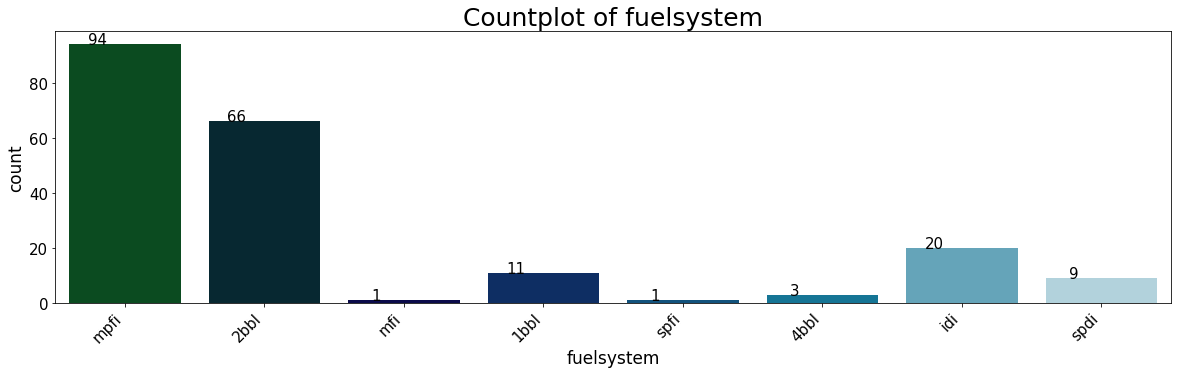

In [23]:
#Countplots of categorical data
#Size of plots
plt.figure(figsize = (15,20))

#Vertical distance configuration between plots 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)

#fueltype
plt.subplot(6,2,1)
ax=sns.countplot(x = "fueltype", 
                 data = data, 
                 palette="ocean").set_title("Countplot of fueltype", fontsize = 20)
plt.xlabel("fueltype",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#aspiration
plt.subplot(6,2,2)
ax=sns.countplot(x = "aspiration", 
                 data = data, 
                 palette="ocean").set_title("Countplot of aspiration", fontsize = 20)
plt.xlabel("aspiration",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#doornumber
plt.subplot(6,2,3)
ax=sns.countplot(x = "doornumber", 
                 data = data, 
                 palette="ocean").set_title("Countplot of doornumber", fontsize = 20)
plt.xlabel("doornumber",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#carbody
plt.subplot(6,2,4)    
ax=sns.countplot(x = "carbody", 
                 data = data, 
                 palette="ocean").set_title("Countplot of carbody", fontsize = 20)
plt.xlabel("carbody",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)

#drivewheel
plt.subplot(6,2,5)
ax=sns.countplot(x = "drivewheel", 
                 data = data, 
                 palette="ocean").set_title("Countplot of drivewheel", fontsize = 20)
plt.xlabel("drivewheel",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#enginelocation
plt.subplot(6,2,6)
ax=sns.countplot(x = "enginelocation", data = data, palette="ocean").set_title("Countplot of enginelocation", fontsize = 20)
plt.xlabel("enginelocation",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#enginetype
plt.subplot(6,2,7)
ax=sns.countplot(x = "enginetype", 
                 data = data, 
                 palette="ocean").set_title("Countplot of enginetype", fontsize = 20)
plt.xlabel("enginetype",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#cylindernumber
plt.subplot(6,2,8)
ax=sns.countplot(x = "cylindernumber", 
                 data = data, 
                 palette="ocean").set_title("Countplot of cylindernumber", fontsize = 20)
plt.xlabel("cylindernumber",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#CompanyName
plt.figure(figsize = (20,5))
ax=sns.countplot(x = "CompanyName", 
                 data = data, 
                 palette="ocean")
ax.set_title("Countplot of CompanyName", fontsize = 25)
plt.xlabel("CompanyName",fontsize=17)
plt.ylabel("count", fontsize=17)
plt.xticks(rotation=45, fontsize=15, horizontalalignment='right')
plt.yticks(fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

#fuelsystem
plt.figure(figsize = (20,5))
ax=sns.countplot(x = "fuelsystem", 
                 data = data, 
                 palette="ocean")
ax.set_title("Countplot of fuelsystem", fontsize = 25)
plt.xlabel("fuelsystem",fontsize=17)
plt.ylabel("count", fontsize=17)
plt.xticks(rotation=45, fontsize=15, horizontalalignment='right')
plt.yticks(fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")
    
plt.show()

### Observations:

<font size="4">
 
* Toyota is the most frequently purchased car brand in the database.
* Four-cylinder cars are by far the most frequently bought.
* Customers prefer the sedan type the most, however, not much less popular is the hatchback.
* The data set shows great interest in gas-powered cars as opposed to oil-powered ones.

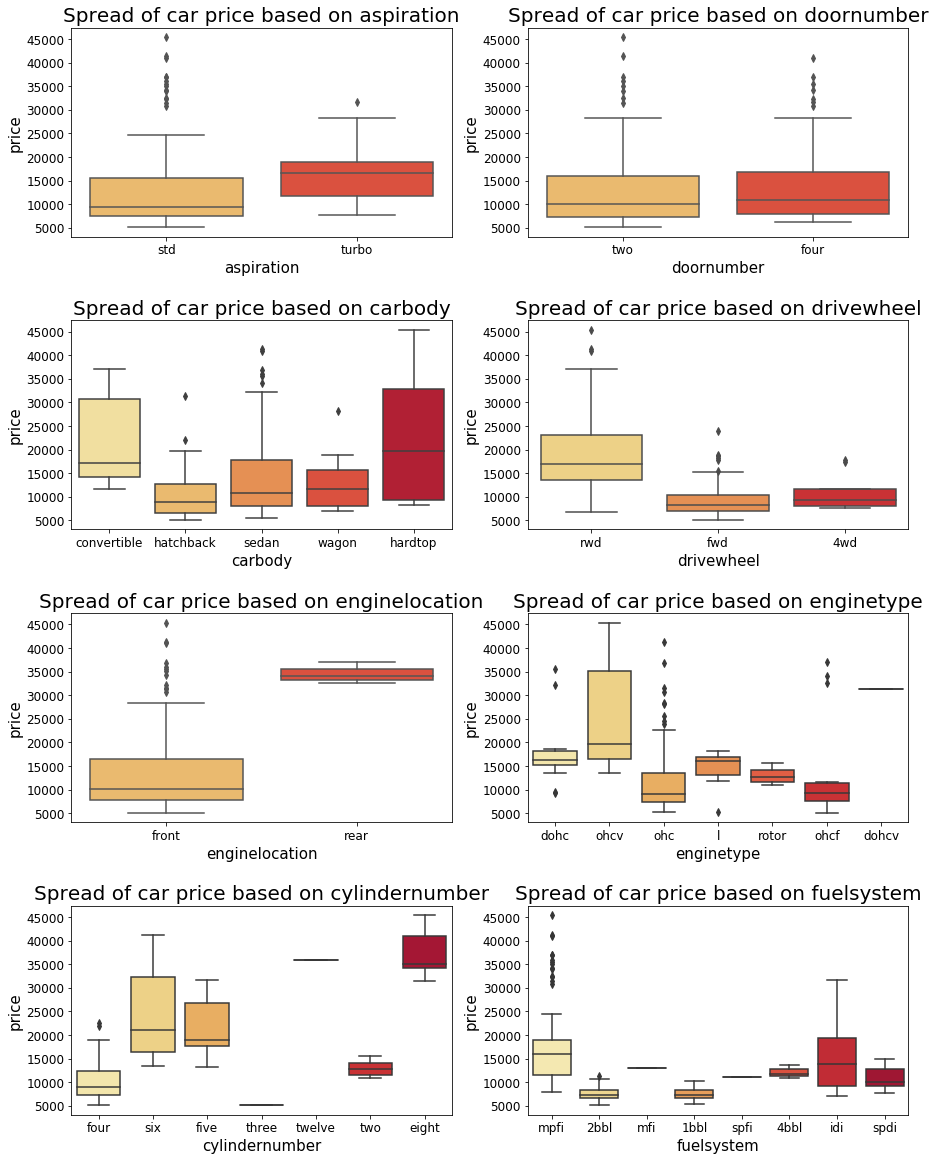

In [24]:
#Boxplots of car price spread based on features 
#Size of plots
plt.figure(figsize = (15,20))

#Vertical and horizontal distance configuration between plots 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)

#aspiration
plt.subplot(4,2,1)
sns.boxplot(x="aspiration",
            y="price",
            data=data,
            palette="YlOrRd").set_title("Spread of car price based on aspiration", fontsize=20)
plt.xlabel("aspiration",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#doornumber
plt.subplot(4,2,2)
sns.boxplot(x="doornumber",
            y="price",
            data=data,
            palette="YlOrRd").set_title("Spread of car price based on doornumber", fontsize=20)
plt.xlabel("doornumber",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#carbody
plt.subplot(4,2,3)
sns.boxplot(x="carbody",
            y="price",
            data=data,
            palette="YlOrRd").set_title("Spread of car price based on carbody", fontsize=20)
plt.xlabel("carbody",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#drivewheel
plt.subplot(4,2,4)
sns.boxplot(x="drivewheel",
            y="price",
            data=data,
            palette='YlOrRd').set_title("Spread of car price based on drivewheel", fontsize=20)
plt.xlabel("drivewheel",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#enginelocation
plt.subplot(4,2,5)
sns.boxplot(x="enginelocation",
            y="price",
            data=data,
            palette="YlOrRd").set_title("Spread of car price based on enginelocation", fontsize=20)
plt.xlabel("enginelocation",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#enginetype
plt.subplot(4,2,6)
sns.boxplot(x="enginetype",
            y="price",
            data=data,
            palette="YlOrRd").set_title("Spread of car price based on enginetype", fontsize=20)
plt.xlabel("enginetype",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#cylindernumber
plt.subplot(4,2,7)
sns.boxplot(x="cylindernumber",
            y="price",
            data=data,
            palette="YlOrRd").set_title("Spread of car price based on cylindernumber", fontsize=20)
plt.xlabel("cylindernumber",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#fuelsystem
plt.subplot(4,2,8)
sns.boxplot(x="fuelsystem",
            y="price",
            data=data,
            palette="YlOrRd").set_title("Spread of car price based on fuelsystem", fontsize=20)
plt.xlabel("fuelsystem",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

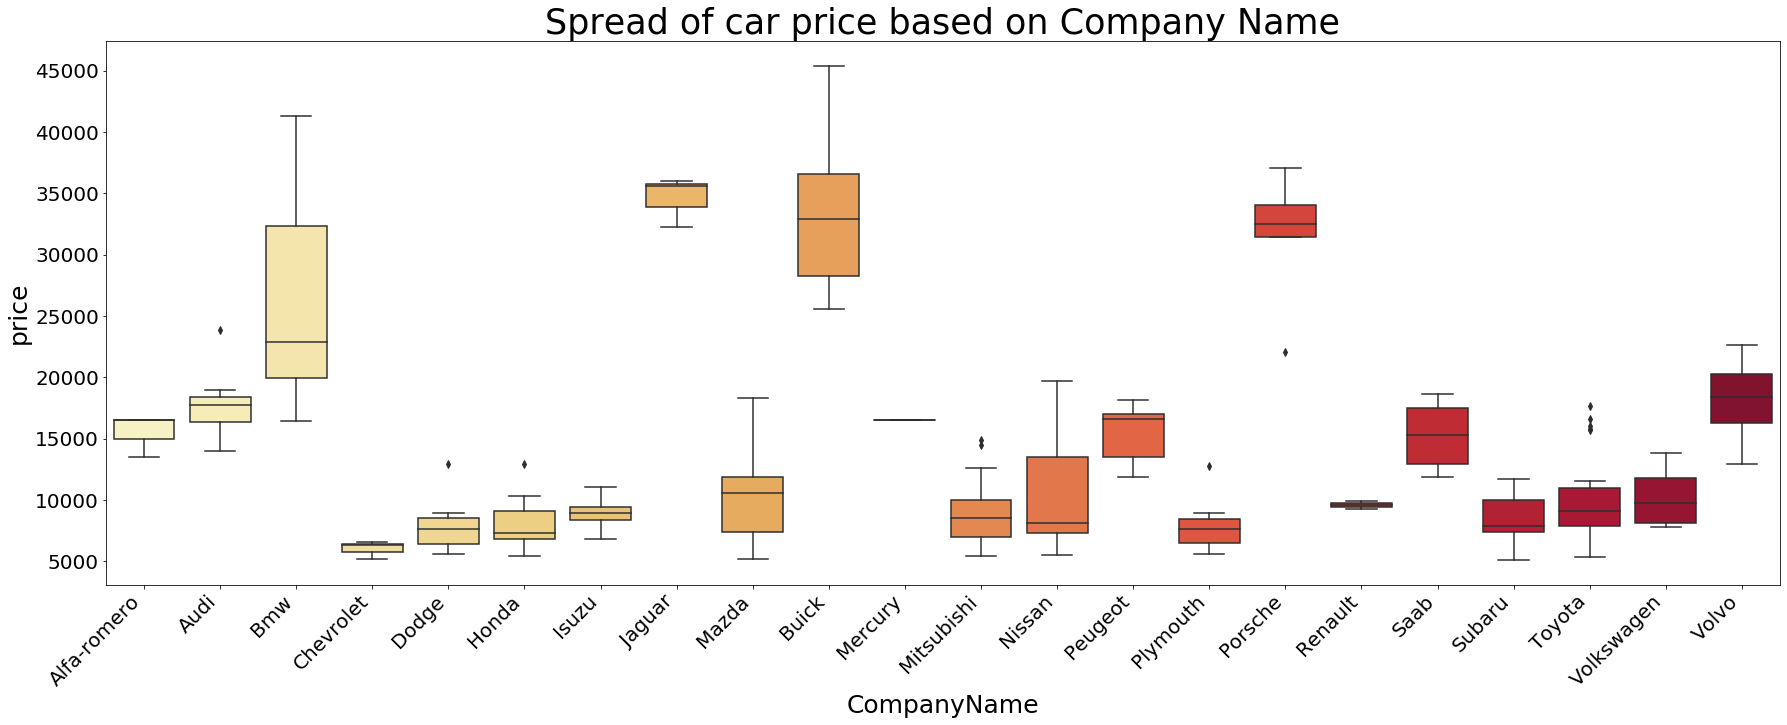

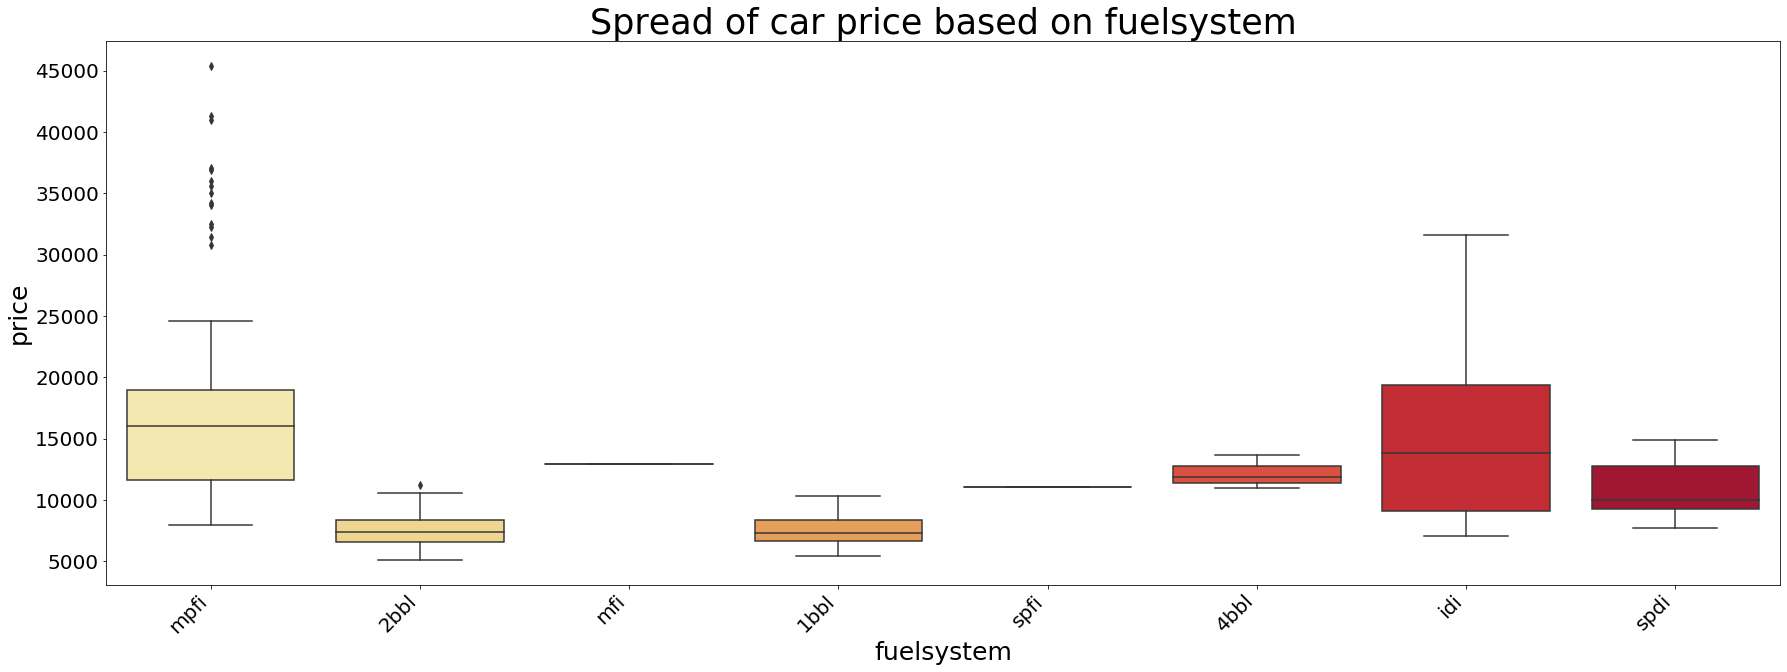

In [25]:
#Boxplots of car price spread based on features 
#Size of plot 
plt.figure(figsize = (30,10))

#CompanyName
sns.boxplot(x="CompanyName",
            y="price",
            data=data,
            palette="YlOrRd").set_title("Spread of car price based on Company Name", fontsize=35)
plt.xlabel("CompanyName",fontsize=25)
plt.ylabel("price", fontsize=25)
plt.xticks(rotation=45, fontsize=20, horizontalalignment="right")
plt.yticks(fontsize=20)


#Boxplots of plot 
plt.figure(figsize = (30,10))
#fuelsystem
sns.boxplot(x="fuelsystem",
            y="price",
            data=data,
            palette="YlOrRd").set_title("Spread of car price based on fuelsystem", fontsize=35)
plt.xlabel("fuelsystem",fontsize=25)
plt.ylabel("price", fontsize=25)
plt.xticks(rotation=45, fontsize=20, horizontalalignment="right")
plt.yticks(fontsize=20)

plt.show()

### 4.3 Visualization of numerical data

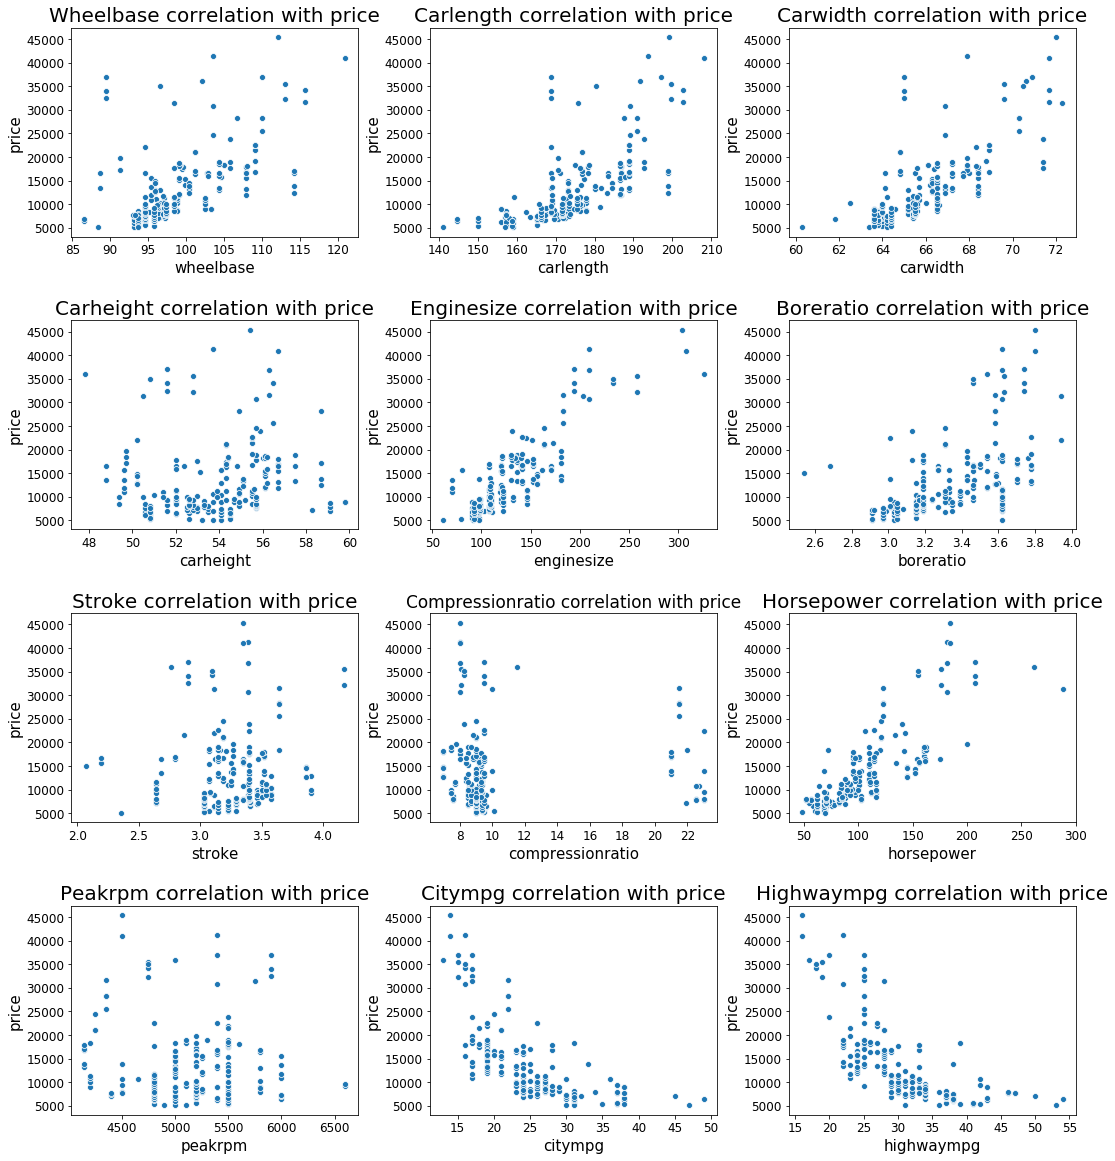

In [26]:
#Scatterplots of correlation between a feature and a car price 
#Size of plots 
plt.figure(figsize = (18,20))

#Vertical and horizontal distance configuration between plots 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.4)

#wheelbase
subplot(4,3,1)
plt1 = sns.scatterplot(x = "wheelbase", 
                       y = "price", 
                       data = data).set_title("Wheelbase correlation with price", fontsize=20)
plt.xlabel("wheelbase",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#carlength
subplot(4,3,2)
plt1 = sns.scatterplot(x = "carlength", 
                       y = "price", 
                       data = data).set_title("Carlength correlation with price", fontsize=20)
plt.xlabel("carlength",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#carwidth
subplot(4,3,3)
plt1 = sns.scatterplot(x = "carwidth", 
                       y = "price", 
                       data = data).set_title("Carwidth correlation with price", fontsize=20)
plt.xlabel("carwidth",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#carheight
subplot(4,3,4)
plt1 = sns.scatterplot(x = "carheight", 
                       y = "price", 
                       data = data).set_title("Carheight correlation with price", fontsize=20)
plt.xlabel("carheight",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#enginesize
subplot(4,3,5)
plt1 = sns.scatterplot(x = "enginesize", 
                       y = "price", 
                       data = data).set_title("Enginesize correlation with price", fontsize=20)
plt.xlabel("enginesize",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#boreratio
subplot(4,3,6)
plt1 = sns.scatterplot(x = "boreratio", 
                       y = "price", 
                       data = data).set_title("Boreratio correlation with price", fontsize=20)
plt.xlabel("boreratio",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#stroke
subplot(4,3,7)
plt1 = sns.scatterplot(x = "stroke", 
                       y = "price", 
                       data = data).set_title("Stroke correlation with price", fontsize=20)
plt.xlabel("stroke",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#compressionratio
subplot(4,3,8)
plt1 = sns.scatterplot(x = "compressionratio", 
                       y = "price",
                       data = data).set_title("Compressionratio correlation with price", fontsize=17)
plt.xlabel("compressionratio",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#horsepower
subplot(4,3,9)
plt1 = sns.scatterplot(x = "horsepower", 
                       y = "price", 
                       data = data).set_title("Horsepower correlation with price", fontsize=20)
plt.xlabel("horsepower",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#peakrpm
subplot(4,3,10)
plt1 = sns.scatterplot(x = "peakrpm", 
                       y = "price", 
                       data = data).set_title("Peakrpm correlation with price", fontsize=20)
plt.xlabel("peakrpm",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#citympg
subplot(4,3,11)
plt1 = sns.scatterplot(x = "citympg", 
                       y = "price", 
                       data = data).set_title("Citympg correlation with price", fontsize=20)
plt.xlabel("citympg",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#highwaympg
subplot(4,3,12)
plt1 = sns.scatterplot(x = "highwaympg", 
                       y = "price", 
                       data = data).set_title("Highwaympg correlation with price", fontsize=20)
plt.xlabel("highwaympg",fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()

### Observations:

<font size="4">

* wheelbase, carlength, carwidth, enginesize, boreratio, horsepower have positive correlation with price
* citympg, highwaympg have negative correlation with price
* carheight, stroke, compressionratio, peakrpm do not have any correlation with price

## 5. Linear Regression models

### 5.1 Dummy variables and binary coding

In [27]:
#Binary coding of values with 2 levels
data["fueltype"]= data["fueltype"].map({"gas":0, "diesel":1})
data["enginelocation"]= data["enginelocation"].map({"front":0, "rear":1})
data["doornumber"]= data["doornumber"].map({"four":4, "two":2})
data["aspiration"]= data["aspiration"].map({"std":0, "turbo":1})

In [28]:
#Conversion of categorical variables with more than 2 levels to dummy variables 
def dummies(x,df):
    temp = pd.get_dummies(data[x], drop_first = True)
    df = pd.concat([data, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

#Activation dummies function 
data = dummies("CompanyName",data)
data = dummies("carbody",data)
data = dummies("drivewheel",data)
data = dummies("enginetype",data)
data = dummies("cylindernumber",data)
data = dummies("fuelsystem",data)

In [29]:
#Dataset with dummy variables 
data.head(10)

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,0,0,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,0,0,2,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,0,0,2,0,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,1,0,0
3,4,2,0,0,4,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,5,2,0,0,4,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0
5,6,2,0,0,2,0,99.8,177.3,66.3,53.1,...,0,0,0,0,0,0,0,1,0,0
6,7,1,0,0,4,0,105.8,192.7,71.4,55.7,...,0,0,0,0,0,0,0,1,0,0
7,8,1,0,0,4,0,105.8,192.7,71.4,55.7,...,0,0,0,0,0,0,0,1,0,0
8,9,1,0,1,4,0,105.8,192.7,71.4,55.9,...,0,0,0,0,0,0,0,1,0,0
9,10,0,0,1,2,0,99.5,178.2,67.9,52.0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
#Shape of dataset after dummying 
print("Dataset contains {} observations as well as {} variables.".format(data.shape[0], data.shape[1]))

Dataset contains 205 observations as well as 66 variables.


### 5.2 MODEL 1 with data selection using Pearson correlation + model evaluation

### 5.2.1 Data selection

<font size ="4">Heatmap was not presented because it is too large and therefore not readable.

In [31]:
#Heatmap with Pearson Correlation 
# plt.figure (figsize = (25,20)) 
cor = data.corr() 
# sns.heatmap (cor, annot = True, cmap = plt.cm.Reds) 
# plt.show()

In [32]:
#Correlation with target variable (price)
#Absolute values of the correlation coefficient 
corAbsoluteValues = abs(cor["price"])

#Selection of variables with correlation coefficient to target variable >0.5 
selectedFeatures = corAbsoluteValues[corAbsoluteValues> 0.5] 
selectedFeatures.sort_values(ascending=False)

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
four          0.697762
highwaympg    0.697599
citympg       0.685751
carlength     0.682920
rwd           0.638957
fwd           0.601950
wheelbase     0.577816
boreratio     0.553173
mpfi          0.517075
Buick         0.515094
2bbl          0.501374
Name: price, dtype: float64

In [33]:
#Correlation coefficient between the independent variables most strongly correlated with the target variable 
cm = sns.light_palette("green", as_cmap=True)
independentVariablesCorr = data[["enginesize", "curbweight", "horsepower", "carwidth", "four", "highwaympg",
                                 "citympg", "carlength", "rwd", "fwd", "wheelbase", "boreratio", "mpfi", 
                                 "Buick", "2bbl"]].corr().style.background_gradient(cmap = cm)
independentVariablesCorr

,enginesize,curbweight,horsepower,carwidth,four,highwaympg,citympg,carlength,rwd,fwd,wheelbase,boreratio,mpfi,Buick,2bbl
enginesize,1,0.850594,0.809769,0.735433,-0.631431,-0.67747,-0.653658,0.68336,0.565509,-0.518391,0.569329,0.583774,0.48352,0.483128,-0.442562
curbweight,0.850594,1,0.750739,0.867032,-0.576463,-0.797465,-0.757414,0.877728,0.669987,-0.666039,0.776386,0.64848,0.52022,0.442556,-0.577159
horsepower,0.809769,0.750739,1,0.640732,-0.639552,-0.770544,-0.801456,0.552623,0.575564,-0.544438,0.353294,0.573677,0.628372,0.215235,-0.541966
carwidth,0.735433,0.867032,0.640732,1,-0.523135,-0.677218,-0.642704,0.841118,0.511149,-0.472116,0.795144,0.55915,0.461896,0.485409,-0.522594
four,-0.631431,-0.576463,-0.639552,-0.523135,1,0.547326,0.541267,-0.40021,-0.434461,0.425481,-0.309492,-0.164076,-0.373291,-0.374655,0.345607
highwaympg,-0.67747,-0.797465,-0.770544,-0.677218,0.547326,1,0.971337,-0.704662,-0.566149,0.600828,-0.544082,-0.587012,-0.610813,-0.286047,0.528009
citympg,-0.653658,-0.757414,-0.801456,-0.642704,0.541267,0.971337,1,-0.670909,-0.545789,0.563879,-0.470414,-0.584532,-0.644489,-0.207487,0.520751
carlength,0.68336,0.877728,0.552623,0.841118,-0.40021,-0.704662,-0.670909,1,0.53837,-0.508714,0.874587,0.606454,0.511374,0.347345,-0.487237
rwd,0.565509,0.669987,0.575564,0.511149,-0.434461,-0.566149,-0.545789,0.53837,1,-0.911996,0.49883,0.574105,0.448977,0.262543,-0.464056
fwd,-0.518391,-0.666039,-0.544438,-0.472116,0.425481,0.600828,0.563879,-0.508714,-0.911996,1,-0.460355,-0.583087,-0.437655,-0.239438,0.410403


<font size="4">Among the variables most correlated with the target variable, the following were excluded from the model: carwidth, citympg, carlength. The elimination criterion consisted in finding the most correlated variables and removing from each such pair the less correlated variable with the target variable.

### 5.2.2 Model building

In [34]:
#Variables to predict the target variable 
Xmodel1 = data[["enginesize", "curbweight", "horsepower", "four", "highwaympg", "rwd", "fwd",
                "wheelbase", "boreratio", "mpfi", "Buick", "2bbl"]]
#Target variable to predict  
yModel1 = data["price"]

In [35]:
#Breakdown of dataset into a training set (60%) and a test set (40%)
X_train_model1, X_test_model1, y_train_model1, y_test_model1 = train_test_split(Xmodel1,
                                                                                yModel1,
                                                                                test_size=0.4,
                                                                                random_state=1)

In [36]:
#Creating an linear regression model object 
lm = LinearRegression()
#Fitting the model to the training data 
lm.fit(X_train_model1,y_train_model1)

LinearRegression()

### 5.2.3 Model interpretation

In [37]:
#Removing scientific notation from numpy array
np.set_printoptions(suppress=True)

In [38]:
#Print the intercept and coefficients 
print(f'alpha = {lm.intercept_.round(2)}')
print(f'betas = {lm.coef_.round(2)}')

alpha = -11620.87
betas = [   36.45     1.22    69.12 -3313.79    97.47   994.62  -207.18    32.77
  1620.25   890.5  10507.65  -812.02]


In [39]:
#Coefficients of model 
coefficientDataFrame1 = pd.DataFrame(lm.coef_,Xmodel1.columns,columns=["Coefficient"])
coefficientDataFrame1.sort_values(by='Coefficient', ascending=False).round(2)

,Coefficient
Buick,10507.65
boreratio,1620.25
rwd,994.62
mpfi,890.50
highwaympg,97.47
horsepower,69.12
enginesize,36.45
wheelbase,32.77
curbweight,1.22
fwd,-207.18


### Interpretations of coefficients:
<br>
<font size ="4">
 
* If car is Buick brand, price increases average by 10507.65 ceteris paribus.
* Increase in boreratio by 1 unit will lead to increase average in price by 1620.25 ceteris paribus.
* If drivewheel is rwd, price increases average by 994.62 ceteris paribus.
* If fuelsystem is mpfi, price increases average by 890.50 ceteris paribus.
* Increase in highwaympg by 1 unit will lead to increase average in price by 97.47 ceteris paribus.
* Increase in horsepower by 1 unit will lead to increase average in price by 69.12 ceteris paribus.
* Increase in enginesize by 1 unit will lead to increase average in price by 36.45 ceteris paribus.
* Increase in wheelbase by 1 unit will lead to increase average in price by 32.77 ceteris paribus.
* Increase in curbweight by 1 unit will lead to increase average in price by 1.22 ceteris paribus.
* If drivewheel is fwd, price decreases average by 207.18 ceteris paribus.
* If fuelsystem is 2bbl, price decreases average by 812.02 ceteris paribus.
* If car has 4 doors, price decreases average by 3313.79 ceteris paribus.

The most significant influence on a change of cars prices have the following features of cars: <br>

**Increase of price:** <br>
car brand (Buick), boreratio, drivewheel (rwd), fuelsystem (mpfi)<br>

**Decrease of price:** <br>
drivewheel (fwd), fuelsystem (2bbl), doorsnumber (4)

In [40]:
#Forecast from test dataset 
predictions_model1 = lm.predict(X_test_model1)

In [41]:
#Forecast from training dataset 
predictions_model1_training = lm.predict(X_train_model1)

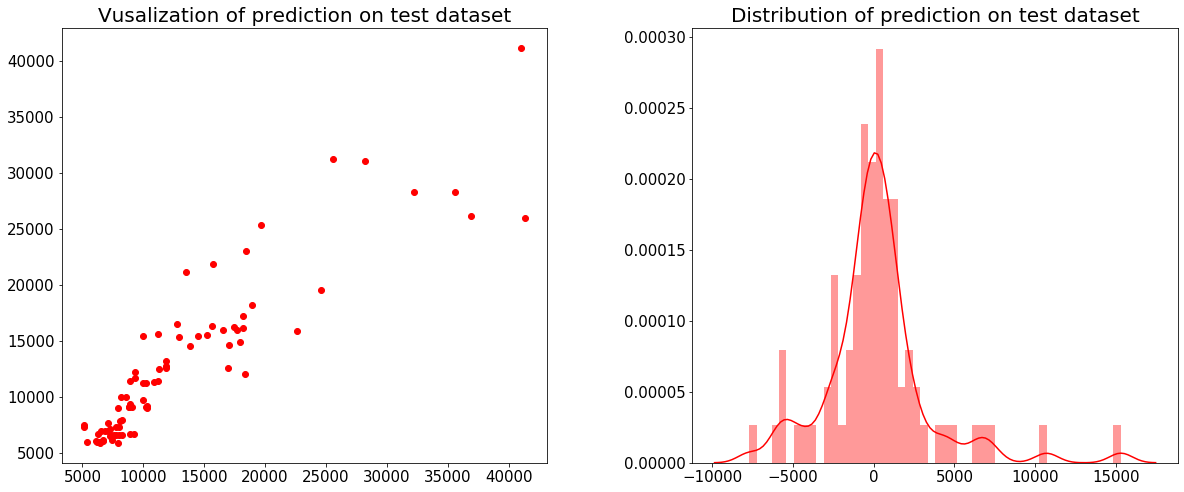

In [42]:
#Visualisation of the forecast from the test dataset 
plt.figure(figsize = (20,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

subplot(1,2,1)
plt.scatter(y_test_model1,
            predictions_model1,
            c="red")
plt.title("Vusalization of prediction on test dataset", fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

subplot(1,2,2)
sns.distplot((y_test_model1-predictions_model1),
             bins=50,
             color="red").set_title("Distribution of prediction on test dataset", fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<font size="4">In the above scatter plot, data is in a line form, which means that model has done good predictions.

In the above histogram plot, data is normally distributed, which means that model has done good predictions.

In [43]:
#Comparison of current values from the test dataset with predicted values
actualPredictedModel1 = pd.DataFrame({"Actual": y_test_model1, "Predicted": predictions_model1.round(2)})
actualPredictedModel1.sample(10)

,Actual,Predicted
114,17075.0,14608.67
33,6529.0,6939.90
98,8249.0,6636.74
29,12964.0,15323.92
197,16515.0,15966.52
44,8916.5,6657.32
122,7609.0,6588.14
190,9980.0,9754.38
19,6295.0,6657.32
97,7999.0,6652.59


In [44]:
#Join base table data with prediction table
Model_1_Prediction = data.join(actualPredictedModel1).round(2)
Model_1_Prediction.sample()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Actual,Predicted
65,66,0,0,0,4,0,104.9,175.0,66.1,54.4,...,0,0,0,0,0,1,0,0,NaN,NaN


### 5.2.4 Export of model prediction to excel

In [45]:
#Save the dataset with probability on the test dataset (40% of the initial dataset) to an excel file 
Model_1_Prediction.to_excel("Prediction of the first model.xlsx",
                                      index=False,
                                      header=True)

### 5.2.5  Model evaluation + comparison of test and training dataset results
<font size="4">The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.<br>
* MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
* R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.<br>

The results of training and test datasets will be compared with each other to exclude possible of overfitting.

In [46]:
#Test dataset
#Evaluation of algorithm performance based on: MAE, MSE, RMSE, R2 
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test_model1, predictions_model1).round(2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test_model1, predictions_model1).round(2))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test_model1, predictions_model1)).round(2))
print("R-squared:", metrics.r2_score(y_test_model1,predictions_model1).round(2))

Mean Absolute Error: 2112.34
Mean Squared Error: 11106289.36
Root Mean Squared Error: 3332.61
R-squared: 0.83


In [47]:
#Training dataset
#Evaluation of algorithm performance based on: MAE, MSE, RMSE, R2 
print("Mean Absolute Error:", metrics.mean_absolute_error(y_train_model1, predictions_model1_training).round(2))
print("Mean Squared Error:", metrics.mean_squared_error(y_train_model1, predictions_model1_training).round(2))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_train_model1, predictions_model1_training)).round(2))
print("R-squared:", metrics.r2_score(y_train_model1,predictions_model1_training).round(2))

Mean Absolute Error: 2049.0
Mean Squared Error: 8178640.49
Root Mean Squared Error: 2859.83
R-squared: 0.87


In [48]:
#Comparison of all algorithms performance in the form of the DataFrame
MAEtest1 = metrics.mean_absolute_error(y_test_model1, predictions_model1)
MSEtest1 = metrics.mean_squared_error(y_test_model1, predictions_model1)
RMSEtest1 = np.sqrt(metrics.mean_squared_error(y_test_model1, predictions_model1))
RSQUAREDtest1 = metrics.r2_score(y_test_model1,predictions_model1)

MAEtrain1 = metrics.mean_absolute_error(y_train_model1, predictions_model1_training)
MSEtrain1 = metrics.mean_squared_error(y_train_model1, predictions_model1_training)
RMSEtrain1 = np.sqrt(metrics.mean_squared_error(y_train_model1, predictions_model1_training))
RSQUAREDtrain1 = metrics.r2_score(y_train_model1,predictions_model1_training)

results_comparison_model_1 = pd.DataFrame({"Model": ["MODEL 1 - TEST dataset", "MODEL 1 - TRAINING dataset"],
                        "Mean Absolute Error": [MAEtest1, MAEtrain1],
                        "Mean Squared Error" : [MSEtest1, MSEtrain1],
                        "Root Mean Squared Error" : [RMSEtest1, RMSEtrain1],
                        "R-squared" : [RSQUAREDtest1, RSQUAREDtrain1]}).set_index("Model")
results_comparison_model_1.round(2)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
Model,,,,
MODEL 1 - TEST dataset,2112.34,11106289.36,3332.61,0.83
MODEL 1 - TRAINING dataset,2049.00,8178640.49,2859.83,0.87


<font size="4"> Results on training and test dataset do not differ significantly from each other. It means that there is no overfitting.

### 5.3 MODEL 2 with data selection using RFE (Recursive Feature Elimination) + model evaluation

### 5.3.1 Data selection

In [49]:
#Division of variables into independent and target variables 
X=data.drop("price",axis=1)
y=data["price"]

In [50]:
### RFE TEST MODEL ###
#Creating an linear regression model object 
model = LinearRegression()
#Creating an RFE model 
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the model to data 
model.fit(X_rfe,y)

LinearRegression()

In [51]:
#Ranking of features after using RFE 
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True False False False False False False
  True False False False False False False False  True  True False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False  True False False False False
 False False False False False]
[53 45 20 31 57  1 50 52 29 48 56 49  1 18 23 54 59 58 55 44  1  1 30 16
 40 39  1 17 21 14 11 37 15  8 10 43  6 13 24 34 28 25 27 26 36 51  7 22
 41 35 12  2  4  1  3  1 42  5 33  9 19 47 32 38 46]


<font size ="4">Below searching for the optimum number of features for which accuracy is highest. Do this by means of a loop starting with 1 feature and going to 65 (all independent variables after dummying). Then take those for which the accuracy is the highest.

In [52]:
#Searching for the optimum number of features for which accuracy is highest 
#Number of features 
nof_list=np.arange(1,65)            
high_score=0
#Variable for storing optimal features 
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 2)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 49
Score with 49 features: 0.675696


<font size="4">As the code above shows, the optimum number of features is 49. Now 49 is the number of features to RFE.

In [53]:
#Searching for the final set of characteristics by RFE 
cols = list(X.columns)
#Creating an linear regression model object 
model = LinearRegression()
#Creating an RFE model with the optimal number of characteristics found above 
rfe = RFE(model, 49)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the model to data 
model.fit(X_rfe,y)
#Creating a Series with selected features 
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
#Finally selected variables using the RFE method 
selected_features_rfe

Index(['fueltype', 'aspiration', 'enginelocation', 'carwidth', 'boreratio',
       'stroke', 'compressionratio', 'Bmw', 'Buick', 'Chevrolet', 'Dodge',
       'Honda', 'Isuzu', 'Jaguar', 'Mazda', 'Mercury', 'Mitsubishi', 'Nissan',
       'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab', 'Subaru', 'Toyota',
       'Volkswagen', 'Volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', 'two', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'],
      dtype='object')

### 5.3.2 Model building

In [54]:
#Variables to predict the target variable
Xmodel2 = data[['aspiration', 'enginelocation', 'carwidth', 'boreratio',
       'stroke', 'compressionratio', 'Bmw', 'Buick', 'Chevrolet', 'Dodge',
       'Honda', 'Isuzu', 'Jaguar', 'Mazda', 'Mercury', 'Mitsubishi', 'Nissan',
       'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab', 'Subaru', 'Toyota',
       'Volkswagen', 'Volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', 'two', '2bbl', '4bbl', 'mpfi', 'spdi']]
#Target variable to predict
yModel2 = data["price"]

In [55]:
#Breakdown of dataset into a training set (60%) and a test set (40%) 
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(Xmodel2,
                                                                                yModel2,
                                                                                test_size=0.4,
                                                                                random_state=2)

In [56]:
#Creating an linear regression model object
lm = LinearRegression()
#Fitting the model to the training data 
lm.fit(X_train_model2,y_train_model2)

LinearRegression()

### 5.3.3 Model interpretation

In [57]:
#Print the intercept and coefficients 
print(f'alpha = {lm.intercept_.round(2)}')
print(f'betas = {lm.coef_.round(2)}')

alpha = -25896.01
betas = [  2464.14   8158.16    716.34   3461.83   1849.09   -268.8   11848.21
   4950.28  -5180.49  -5612.49  -7866.28  -5925.92   3052.88  -5888.37
  -3691.87  -6260.47  -5418.04  -3718.77  -6077.7    3940.17  -7238.72
  -2397.77  -8210.    -5057.31  -4209.55  -1600.94    390.13    675.2
   1021.64   1228.53   -281.32 -12789.27  -3718.77  -2536.75    -51.84
  -3801.99  -6153.04 -15457.29 -16904.07 -10862.41      0.     -194.05
  -6153.04  -2833.46  -7273.16  -3023.16  -3368.16]


In [58]:
#Coefficients of model and removing of scientific notationfrom "Coefficient" column in created DataFrame
coefficientDataFrame2 = pd.DataFrame(lm.coef_,Xmodel2.columns,columns=["Coefficient"]) 
coefficientDataFrame2["Coefficient"] = coefficientDataFrame2["Coefficient"].apply(lambda x: "%.7f" % x)
coefficientDataFrame2.sort_values(by="Coefficient", ascending=False)

,Coefficient
enginelocation,8158.1559506
carwidth,716.3392846
hatchback,675.1983647
Buick,4950.2797075
Porsche,3940.1691804
hardtop,390.1268928
boreratio,3461.8286931
Jaguar,3052.8833695
aspiration,2464.1365156
stroke,1849.0857108


### Interpretations of coefficients:
<br>
<font size="4">

* If enginesize is rear, price is an average 8158.15 more than if enginesize is front ceteris paribus.
* Increase in carwidth by 1 unit will lead to average increase in price by 716.33 ceteris paribus.<br>
And so on...

The most significant influence on a change of cars prices have the following features of cars: <br>

**Increase of price:** <br>
enginelocation (rear), carwidth, car brand (Bmw), car brand (Buick)<br>

**Decrease of price:** <br>
cyindernumber (four), cylinernumber (five), enginetype (dohcv)

In [59]:
#Forecast from test dataset 
predictions_model2 = lm.predict(X_test_model2)

In [60]:
#Forecast from training dataset 
predictions_model2_training = lm.predict(X_train_model2)

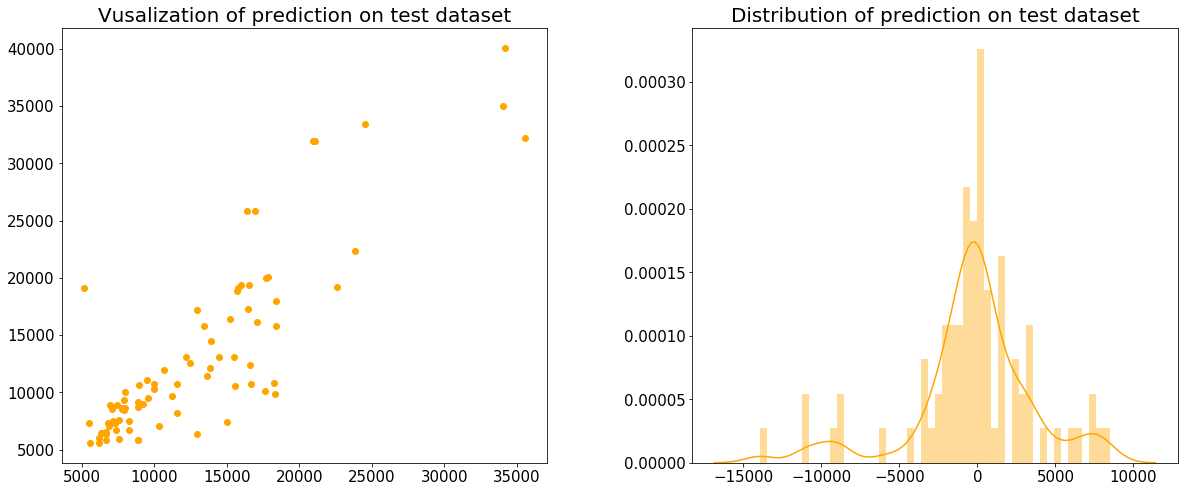

In [61]:
#Visualisation of the forecast from the test dataset 
plt.figure(figsize = (20,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

subplot(1,2,1)
plt.scatter(y_test_model2,
            predictions_model2,
            c="orange")
plt.title("Vusalization of prediction on test dataset", fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

subplot(1,2,2)
sns.distplot((y_test_model2-predictions_model2),
             bins=50,
             color="orange").set_title("Distribution of prediction on test dataset", fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<font size="4">In the above scatter plot, data is in a line form, which means that model has done good predictions.

In the above histogram plot, data is normally distributed, which means that model has done good predictions.

In [62]:
#Comparison of current values from the test dataset with predicted values
actualPredictedModel2 = pd.DataFrame({"Actual": y_test_model2, "Predicted": predictions_model2.round(2)})
actualPredictedModel2.sample(10)

,Actual,Predicted
53,6695.0,6565.40
127,34028.0,34973.06
151,6338.0,6467.55
48,35550.0,32250.00
140,7603.0,7557.10
134,15040.0,7393.48
45,8916.5,5862.79
122,7609.0,5922.23
152,6488.0,6467.55
28,8921.0,9115.47


In [63]:
#Join base table data with prediction table
Model_2_Prediction = data.join(actualPredictedModel2).round(2)
Model_2_Prediction.sample()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Actual,Predicted
42,43,1,0,0,2,0,96.5,169.1,66.0,51.0,...,0,1,0,0,0,0,0,0,10345.0,7060.54


### 5.3.4 Export of model prediction to excel

In [64]:
#Save the dataset with probability on the test dataset (40% of the initial dataset) to an excel file 
Model_2_Prediction.to_excel("Prediction of the second model.xlsx",
                                      index=False,
                                      header=True)

###  5.3.5 Model evaluation + comparison of test and training dataset results
<br>
<font size="4">
    
The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.<br>
* MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
* R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.<br>

The results of training and test datasets will be compared with each other to exclude possible of overfitting.

In [65]:
#Test dataset
#Evaluation of algorithm performance based on: MAE, MSE, RMSE, R2 
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test_model2, predictions_model2).round(2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test_model2, predictions_model2).round(2))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test_model2, predictions_model2)).round(2))
print("R-squared:", metrics.r2_score(y_test_model2,predictions_model2).round(2))

Mean Absolute Error: 2586.87
Mean Squared Error: 15660673.8
Root Mean Squared Error: 3957.36
R-squared: 0.62


In [66]:
#Training dataset
#Evaluation of algorithm performance based on: MAE, MSE, RMSE, R2 
print("Mean Absolute Error:", metrics.mean_absolute_error(y_train_model2, predictions_model2_training).round(2))
print("Mean Squared Error:", metrics.mean_squared_error(y_train_model2, predictions_model2_training).round(2))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_train_model2, predictions_model2_training)).round(2))
print("R-squared:", metrics.r2_score(y_train_model2,predictions_model2_training).round(2))

Mean Absolute Error: 940.92
Mean Squared Error: 1753092.5
Root Mean Squared Error: 1324.04
R-squared: 0.98


In [67]:
#Comparison of all algorithms performance in the form of the DataFrame
MAEtest2 = metrics.mean_absolute_error(y_test_model2, predictions_model2)
MSEtest2 = metrics.mean_squared_error(y_test_model2, predictions_model2)
RMSEtest2 = np.sqrt(metrics.mean_squared_error(y_test_model2, predictions_model2))
RSQUAREDtest2 = metrics.r2_score(y_test_model2,predictions_model2)

MAEtrain2 = metrics.mean_absolute_error(y_train_model2, predictions_model2_training)
MSEtrain2 = metrics.mean_squared_error(y_train_model2, predictions_model2_training)
RMSEtrain2 = np.sqrt(metrics.mean_squared_error(y_train_model2, predictions_model2_training))
RSQUAREDtrain2 = metrics.r2_score(y_train_model2,predictions_model2_training)

results_comparison_model_2 = pd.DataFrame({"Model": ["MODEL 2 - TEST dataset", "MODEL 2 - TRAINING dataset"],
                        "Mean Absolute Error": [MAEtest2, MAEtrain2],
                        "Mean Squared Error" : [MSEtest2, MSEtrain2],
                        "Root Mean Squared Error" : [RMSEtest2, RMSEtrain2],
                        "R-squared" : [RSQUAREDtest2, RSQUAREDtrain2]}).set_index("Model")
results_comparison_model_2.round(2)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
Model,,,,
MODEL 2 - TEST dataset,2586.87,15660673.8,3957.36,0.62
MODEL 2 - TRAINING dataset,940.92,1753092.5,1324.04,0.98


<font size="4"> Results on training and test datasets differ significantly from each other. It means that there could be overfitting.

### 5.4 MODEL 3 with data selection using embedded method (LASSO regularization) + model evaluation

### 5.4.1 Data selection

In [68]:
#Division of variables into independent and target variables 
X=data.drop("price",axis=1)
y=data["price"]
#Creating an Lasso regularization object 
reg = LassoCV()
#Fit the Lasso to the data 
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))

Best alpha using built-in LassoCV: 3457.616199
Best score using built-in LassoCV: 0.829754


In [69]:
#Number of variables selected by the Lasso model 
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 60 variables


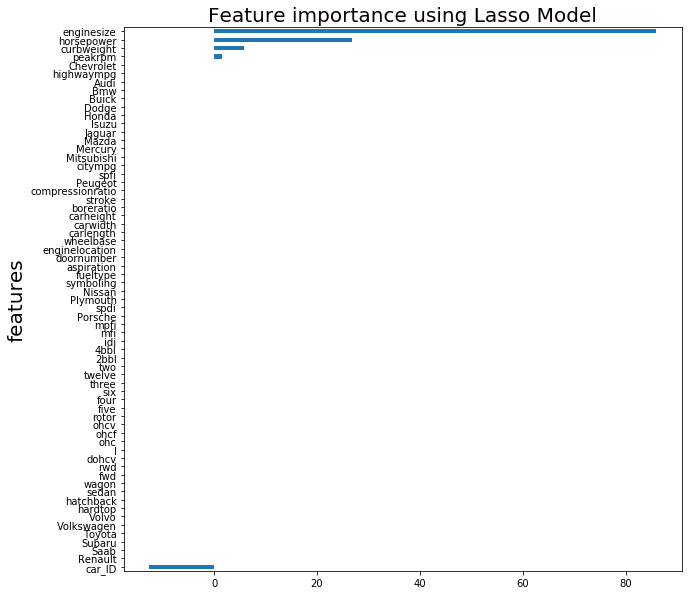

In [70]:
#Variables selected by the Lasso method 
imp_coef = coef.sort_values()
plt.figure(figsize = (10,10))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model", fontsize=20)
plt.xlabel("")
plt.ylabel("features", fontsize=20)
plt.show()

<font size="4">Five features was selected by Lasso model: enginesize, horsepower, curbweight, peakrpm and car_ID.

### 5.4.2 Model building

In [71]:
#Variables to predict the target variable
Xmodel3 = data[["enginesize", "horsepower", "curbweight", "peakrpm", "car_ID"]]
#Target variable to predict / zmienna celu 
yModel3 = data["price"]

In [72]:
#Breakdown of dataset into a training set (60%) and a test set (40%) / podział zbioru danych na treningowy (60%) i testowy (40%)
X_train_model3, X_test_model3, y_train_model3, y_test_model3 = train_test_split(Xmodel3,
                                                                                yModel3,
                                                                                test_size=0.4,
                                                                                random_state=3)

In [73]:
#Creating an linear regression model object
lm = LinearRegression()
#Fitting the model to the training data
lm.fit(X_train_model3,y_train_model3)

LinearRegression()

### 5.4.3 Model interpretation

In [74]:
#Print the intercept and coefficients
print(f'alpha = {lm.intercept_.round(2)}')
print(f'betas = {lm.coef_.round(2)}')

alpha = -24375.96
betas = [ 69.45  41.48   5.85   2.08 -11.22]


In [75]:
#Coefficients of model 
coefficientDataFrame3 = pd.DataFrame(lm.coef_,Xmodel3.columns,columns=['Coefficient']) 
coefficientDataFrame3.sort_values(by='Coefficient', ascending=False).round(2)

,Coefficient
enginesize,69.45
horsepower,41.48
curbweight,5.85
peakrpm,2.08
car_ID,-11.22


#### Interpretations of coefficients:
<br>
<font size ="4">
    
* Increase in enginesize by 1 unit will lead to average increase in price by 69.45 ceteris paribus.
* Increase in horsepower by 1 unit will lead to average increase in price by 41.48 ceteris paribus.
* Increase in curbweight by 1 unit will lead to average increase in price by 5.85 ceteris paribus.
* Increase in peakrpm by 1 unit will lead to average increase in price by 2.08 ceteris paribus.
* Increase in car_ID by 1 unit will lead to average decrease in price by 11.22 ceteris paribus.

The most significant influence on a change of cars prices have the following features of cars: <br>

**Increase of price:** <br>
enginesize, horsepower<br>

**Decrease of price:** <br>
curbweight, peakrpm, car_ID

In [76]:
#Forecast from test dataset
predictions_model3 = lm.predict(X_test_model3)

In [77]:
#Forecast from training dataset
predictions_model3_training = lm.predict(X_train_model3)

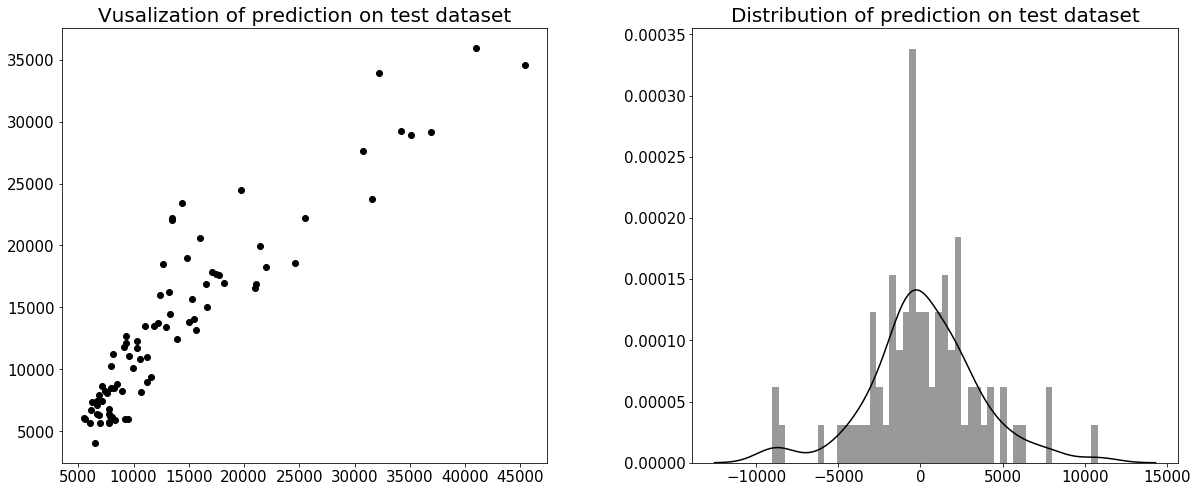

In [78]:
#Visualisation of the forecast from the test dataset
plt.figure(figsize = (20,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

subplot(1,2,1)
plt.scatter(y_test_model3,
            predictions_model3,
            c="black")
plt.title("Vusalization of prediction on test dataset", fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

subplot(1,2,2)
sns.distplot((y_test_model3-predictions_model3),
             bins=50,
             color="black").set_title("Distribution of prediction on test dataset", fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<font size="4">In the above scatter plot, data is in a line form, which means that model has done good predictions.

In the above histogram plot, data is normally distributed, which means that model has done good predictions.

In [79]:
#Comparison of current values from the test dataset with predicted values
actualPredictedModel3 = pd.DataFrame({"Actual": y_test_model3, "Predicted": predictions_model3.round(2)})
actualPredictedModel3.sample(10)

,Actual,Predicted
183,7975.0,8472.22
34,7129.0,8668.51
73,40960.0,35964.13
156,6938.0,5706.31
141,7126.0,7441.13
165,9298.0,12160.82
102,14399.0,23412.99
95,7799.0,6800.66
72,35056.0,28895.16
82,12629.0,18488.31


In [80]:
#Join base table data with prediction table
Model_3_Prediction = data.join(actualPredictedModel3).round(2)
Model_3_Prediction.sample()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Actual,Predicted
87,88,1,0,1,4,0,96.3,172.4,65.4,51.6,...,0,0,0,0,0,0,1,0,NaN,NaN


### 5.4.4 Export of model prediction to excel

In [81]:
#Save the dataset with probability on the test dataset (40% of the initial dataset) to an excel file 
Model_3_Prediction.to_excel("Prediction of the third model.xlsx",
                                      index=False,
                                      header=True)

### 5.4.5 Model evaluation + comparison of training and test dataset results
<br>
<font size="4">
    
The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.<br>
* MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
* R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.<br>

The results of training and test datasets will be compared with each other to exclude possible of overfitting.

In [82]:
#Test dataset
#Evaluation of algorithm performance based on: MAE, MSE, RMSE, R2 
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test_model3, predictions_model3).round(2))
print("Mean Squared Error:", metrics.mean_squared_error(y_test_model3, predictions_model3).round(2))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test_model3, predictions_model3)).round(2))
print("R-squared:", metrics.r2_score(y_test_model3,predictions_model3).round(2))

Mean Absolute Error: 2465.99
Mean Squared Error: 11528276.95
Root Mean Squared Error: 3395.33
R-squared: 0.85


In [83]:
#Training dataset
#Evaluation of algorithm performance based on: MAE, MSE, RMSE, R2 
print("Mean Absolute Error:", metrics.mean_absolute_error(y_train_model3, predictions_model3_training).round(2))
print("Mean Squared Error:", metrics.mean_squared_error(y_train_model3, predictions_model3_training).round(2))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_train_model3, predictions_model3_training)).round(2))
print("R-squared:", metrics.r2_score(y_train_model3,predictions_model3_training).round(2))

Mean Absolute Error: 2456.25
Mean Squared Error: 11023153.02
Root Mean Squared Error: 3320.11
R-squared: 0.8


In [84]:
#Comparison of all algorithms performance in the form of the DataFrame
MAEtest3 =  metrics.mean_absolute_error(y_test_model3, predictions_model3)
MSEtest3 = metrics.mean_squared_error(y_test_model3, predictions_model3)
RMSEtest3 = np.sqrt(metrics.mean_squared_error(y_test_model3, predictions_model3))
RSQUAREDtest3 = metrics.r2_score(y_test_model3,predictions_model3)

MAEtrain3 = metrics.mean_absolute_error(y_train_model3, predictions_model3_training)
MSEtrain3 = metrics.mean_squared_error(y_train_model3, predictions_model3_training)
RMSEtrain3 = np.sqrt(metrics.mean_squared_error(y_train_model3, predictions_model3_training))
RSQUAREDtrain3 = metrics.r2_score(y_train_model3,predictions_model3_training)

results_comparison_model_3 = pd.DataFrame({"Model": ["MODEL 3 - TEST dataset", "MODEL 3 - TRAINING dataset"],
                        "Mean Absolute Error": [MAEtest3, MAEtrain3],
                        "Mean Squared Error" : [MSEtest3, MSEtrain3],
                        "Root Mean Squared Error" : [RMSEtest3, RMSEtrain3],
                        "R-squared" : [RSQUAREDtest3, RSQUAREDtrain3]}).set_index("Model")
results_comparison_model_3.round(2)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
Model,,,,
MODEL 3 - TEST dataset,2465.99,11528276.95,3395.33,0.85
MODEL 3 - TRAINING dataset,2456.25,11023153.02,3320.11,0.80


<font size="4"> Results on training and test dataset do not differ significantly from each other. It means that there is no overfitting.

## 6. Models comparison

In [85]:
#The variables corresponding to the performance evaluation of all algorithms (based on test dataset)
MAE1 = metrics.mean_absolute_error(y_test_model1, predictions_model1)
MAE2 = metrics.mean_absolute_error(y_test_model2, predictions_model2)
MAE3 = metrics.mean_absolute_error(y_test_model3, predictions_model3)

MSE1 = metrics.mean_squared_error(y_test_model1, predictions_model1)
MSE2 = metrics.mean_squared_error(y_test_model2, predictions_model2)
MSE3 = metrics.mean_squared_error(y_test_model3, predictions_model3)

RMSE1 = np.sqrt(metrics.mean_squared_error(y_test_model1, predictions_model1))
RMSE2 = np.sqrt(metrics.mean_squared_error(y_test_model2, predictions_model2))
RMSE3 = np.sqrt(metrics.mean_squared_error(y_test_model3, predictions_model3))

Rsquared1 = metrics.r2_score(y_test_model1,predictions_model1)
Rsquared2 = metrics.r2_score(y_test_model2,predictions_model2)
Rsquared3 = metrics.r2_score(y_test_model3,predictions_model3)

In [86]:
#Comparison of all algorithms performance in the form of the DataFrame 
modelComparison = pd.DataFrame({"Model": ["MODEL 1", "MODEL 2", "MODEL 3"],
                        "Mean Absolute Error": [MAE1, MAE2, MAE3],
                        "Mean Squared Error" : [MSE1, MSE2, MSE3],
                        "Root Mean Squared Error" : [RMSE1, RMSE2, RMSE3],
                        "R-squared" : [Rsquared1, Rsquared2, Rsquared3]}).set_index("Model")
modelComparison.round(2)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
Model,,,,
MODEL 1,2112.34,11106289.36,3332.61,0.83
MODEL 2,2586.87,15660673.80,3957.36,0.62
MODEL 3,2465.99,11528276.95,3395.33,0.85


<font size="4">
   
**Model 1** has the lowest average error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) and really high R-squared which demonstrated high quality of the model.<br>

**Model 2** has the highest average error (MAE), the highest Mean Squared Error (MSE), the highest Root Mean Squared Error (RMSE) as well as the lowest R-squared so it is definitely the worst model. Nevertheless, this model is overfit, so cannot be taken into account when choosing a model.<br>

**Model 3** is an intermediate model in terms of quality compared to the other models, despite the hoghest R-squared.

## 7. Conclusions

<font size="4">

**General summary** <br>
* The main problem of this project was to predict car price based on its attributes. <br>
* To predict car price, have built models using machine learning techniques. <br>
* Built algorithms are able to predict car price with mean average error between 2112.34 and 2528.14. <br>

**EDA (Exploratory Data Analysis) summary** <br>
* Base dataset contained 25 features and 1 target variable (price). Furthermore the dataset had only 205 observations.<br>
* The dataset did not contain missing values.<br>
* Data was cleaned and formatted and then grouped and visualised using countplot, boxplot or histogram. <br>

**Modelling summary**<br>
* In order to build the best models and avoid ovrfitting three different data selection methods were used to build the models: Pearson correlation, RFE (Recursive Feature Elimination) as well as Lasso regularizaion. <br>
* In each model Test size was choosed to be 40% of initial dataset.<br>
* Random states: 1, 2, 3<br>
* All models are linear regression models. <br>
* In the first model fearutes: car brand (Buick), boreratio, drivewheel (rwd), fuelsystem (mpfi) have the most significant impact on increase of price and drivewheel (fwd), fuelsystem (2bbl), doorsnumber (4) have the most significant impact on decrease of price<br>
* In the second model fearutes: car brand (BMW), enginelocation (rear), fuelsystem (idi) have the most significant impact on increase of price and enginetype (dohcv), cylindernumber (five), doornumber (four) have the most significant impact on decrease of price. Nevertheless this model could be overfit. Results on the training and test datasets differ significantly from each other. <br>
* In the third model fearutes: enginesize, horsepower have the most significant impact on increase of price and curbweight, peakrmp, car_ID have the most significant impact on decrease of price<br>
* Models were evaluated based on: MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error), R-Squared.<br>
* Model 2 could be overfit, results on the training and test datasets differ significantly from each other.
* Model 1 has the best performance.<br>